In [7]:
import numpy as np
import cv2
import time as t
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('tans2.jpg')
for i in range (300):
    img = cv2.resize(img,None,fx=0.5, fy=0.5, interpolation = cv2.cv2.INTER_LINEAR)
    img = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.cv2.INTER_LINEAR)
cv2.imshow('slika', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1]:
print(img[0][0])

NameError: name 'img' is not defined

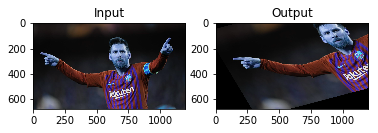

In [7]:
import cv2
import numpy as np

img = cv2.imread('messi.jpg')
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

cv2.imshow('input', img)
cv2.imshow('output', dst)
cv2.waitKey(0)
plt.subplot(121),plt.imshow(img),plt.title('Input')
plt.subplot(122),plt.imshow(dst),plt.title('Output')
plt.show()


In [8]:
cap = cv2.VideoCapture(0)
n = 0

while True:
    timet = t.time()
    __, img = cap.read()
    
    kernel = np.ones((5, 5), np.float32) / 5/5
    kernel2 = np.array([[0 , 1, 2],
                        [1, 2, 3],
                        [2, 3, 8]]) / 22
    dst = cv2.filter2D(img, -1 ,kernel)
    med = cv2.medianBlur(img, 5)
    blur = cv2.bilateralFilter(img,9,75,75)
    
    cv2.imshow('dst', dst)
    cv2.imshow('med', med)
    cv2.imshow('bil', blur)
    cv2.imshow('img', img)

    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
        
    n+= 1
    if n>50:
        print(1/(t.time()-timet))
        n = 0
cap.release()
cv2.destroyAllWindows()

10.410957272000676
31.528297490096442
31.685734143172272
30.95335931042626


In [8]:
import numpy as np
import cv2

cap = cv2.VideoCapture(0)
while(True):
    
    # Capture frame-by-frame
    ret, frame = cap.read()

    # Our operations on the frame come here
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Display the resulting frame
    cv2.imshow('frame',gray)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        


# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

27.929256339228637
27.596828634404712
29.721331339772252
30.589234011829312
31.592416561843283
31.651541334943214
31.82904322486644
30.723000292997362
31.069148660360447


In [2]:
cap.release()
cv2.destroyAllWindows()

NameError: name 'cap' is not defined

In [9]:
def no():
    a = 0

In [13]:
img = cv2.imread('j.png', 0)
kernel = np.ones((2, 2), np.uint8)
ero = cv2.erode(img, kernel, 1)
dil = cv2.dilate(img, kernel, 1)
grad = dil - ero
cv2.imshow('grad', grad)
cv2.imshow('erod', ero)
cv2.imshow('norm', img)
cv2.imshow('dil', dil)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [10]:
def read_trackbars():
    hl = cv2.getTrackbarPos('h', 'low')
    sl = cv2.getTrackbarPos('s', 'low')
    vl = cv2.getTrackbarPos('v', 'low')
    
    hh = cv2.getTrackbarPos('h', 'high')
    sh = cv2.getTrackbarPos('s', 'high')
    vh = cv2.getTrackbarPos('v', 'high')

In [11]:
def setup_trackbars():
    cv2.namedWindow('low')
    cv2.namedWindow('high')
    cv2.createTrackbar('h', 'low', 0, 179, no)
    cv2.createTrackbar('s', 'low', 0, 255, no)
    cv2.createTrackbar('v', 'low', 0, 255, no)
    cv2.createTrackbar('h', 'high', 0, 179, no)
    cv2.createTrackbar('s', 'high', 0, 255, no)
    cv2.createTrackbar('v', 'high', 0, 255, no)

In [12]:
cap = cv2.VideoCapture(0)
setup_trackbars()
hl = sl = vl = hh = sh = vh = 0
hight = [hh, sh, vh]
lowt = [hl, sl, vl]

lowi = np.zeros((200, 200, 3), np.uint8)
highi = np.zeros((200, 200, 3), np.uint8)

while True:
    __, img = cap.read()
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hl = cv2.getTrackbarPos('h', 'low')
    sl = cv2.getTrackbarPos('s', 'low')
    vl = cv2.getTrackbarPos('v', 'low')
    
    hh = cv2.getTrackbarPos('h', 'high')
    sh = cv2.getTrackbarPos('s', 'high')
    vh = cv2.getTrackbarPos('v', 'high')
    
    hight = np.array([hh, sh, vh], np.uint8)
    highi[:] = [hh, sh, vh]
    highc = cv2.cvtColor(highi, cv2.COLOR_HSV2BGR)
    
    lowt = np.array([hl, sl, vl], np.uint8)
    lowi[:] = [hl, sl, vl]
    lowc = cv2.cvtColor(lowi, cv2.COLOR_HSV2BGR)
    
    
    
    mask = cv2.inRange(hsv, lowt, hight)
    kernel = np.ones((5, 5), np.uint8)/25
    proc = cv2.erode(mask, kernel, 1)
    #proc = cv2.dilate(mask, kernel, 1)
    
    
    
    cv2.imshow('low', lowc)
    cv2.imshow('high', highc)
    cv2.imshow('img', img)
    cv2.imshow('mask', mask)
    cv2.imshow('proc', proc)
    
    if cv2.waitKey(1) != -1:
        break

cap.release()
cv2.destroyAllWindows()

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given

TypeError: no() takes 0 positional arguments but 1 was given